In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_imdb_name_basics = pd.read_csv('imdb.name.basics.csv.gz')
df_imdb_title = pd.read_csv('imdb.title.akas.csv.gz')
df_imdb_basics = pd.read_csv('imdb.title.basics.csv.gz')
df_imdb_title_crew = pd.read_csv('imdb.title.crew.csv.gz')
df_imdb_title_principals = pd.read_csv('imdb.title.principals.csv.gz')
df_imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
df_tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')


In [3]:
df_imdb_name_basics.head()
# df_imdb_title.head()
# df_imdb_basics.head()
# df_imdb_title_crew.head()
# df_imdb_title_principals.head()
# df_imdb_title_ratings.head()
#df_tn_movie_budgets.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
df_imdb_title = df_imdb_title.query("region == 'US'")
df_imdb_title = df_imdb_title[['title_id','title']]
df_imdb_title.drop_duplicates(subset=['title_id'],inplace = True)
df_imdb_title

,title_id,title
12,tt0369610,Jurassic World 3D
50,tt0401729,John Carter of Mars
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience
152,tt10379338,Guys Night Out
157,tt10446418,The Icon
...,...,...
331641,tt9310460,Coconut The Little Dragon Into The Jungle
331654,tt9358044,Hail Satan?
331673,tt9562694,Alien Warfare
331686,tt9705860,Dusan Vukotic Croatian Oscar Winner


In [5]:
df_imdb_name_basics = df_imdb_name_basics[df_imdb_name_basics['known_for_titles'].notna()]
df_imdb_name_basics = df_imdb_name_basics[['nconst','primary_name', 'primary_profession', 'known_for_titles']]
df_imdb_name_basics['known_for_titles'] = df_imdb_name_basics['known_for_titles'].str.split(",")
#Names of 
#nconst 

In [6]:
mask = df_imdb_name_basics['primary_profession'].str.contains('director|writer', na=True)

directors_writers_df = df_imdb_name_basics[mask]

In [7]:
df_imdb_title

,title_id,title
12,tt0369610,Jurassic World 3D
50,tt0401729,John Carter of Mars
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience
152,tt10379338,Guys Night Out
157,tt10446418,The Icon
...,...,...
331641,tt9310460,Coconut The Little Dragon Into The Jungle
331654,tt9358044,Hail Satan?
331673,tt9562694,Alien Warfare
331686,tt9705860,Dusan Vukotic Croatian Oscar Winner


In [8]:
df_imdb_basics.query("start_year == start_year.min()")
df_imdb_title = df_imdb_title.merge(df_imdb_basics, how="inner", left_on="title_id", right_on="tconst")
#Oldest movies start in 2010


In [9]:
df_imdb_title

,title_id,title,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,Jurassic World 3D,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0401729,John Carter of Mars,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi"
2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy"
3,tt10379338,Guys Night Out,tt10379338,Random Night Out,Random Night Out,2019,NaN,Comedy
4,tt10446418,The Icon,tt10446418,Icon,Icon,2011,215.0,"Documentary,History"
...,...,...,...,...,...,...,...,...
47428,tt9310460,Coconut The Little Dragon Into The Jungle,tt9310460,Coconut the Little Dragon 2 Into the Jungle,Der kleine Drache Kokosnuss - Auf in den Dschu...,2018,NaN,"Adventure,Animation,Comedy"
47429,tt9358044,Hail Satan?,tt9358044,Hail Satan?,Hail Satan?,2019,95.0,Documentary
47430,tt9562694,Alien Warfare,tt9562694,Alien Warfare,Alien Warfare,2019,88.0,"Action,Sci-Fi"
47431,tt9705860,Dusan Vukotic Croatian Oscar Winner,tt9705860,Dusan Vukotic Croatian Oscar Winner,Dusan Vukotic hrvatski okarovac,2011,55.0,Documentary


In [10]:
df_imdb_title.columns

df_imdb_title = df_imdb_title[['title_id', 'title', 'start_year', 'runtime_minutes']]

In [11]:
df_imdb_title

,title_id,title,start_year,runtime_minutes
0,tt0369610,Jurassic World 3D,2015,124.0
1,tt0401729,John Carter of Mars,2012,132.0
2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0
3,tt10379338,Guys Night Out,2019,NaN
4,tt10446418,The Icon,2011,215.0
...,...,...,...,...
47428,tt9310460,Coconut The Little Dragon Into The Jungle,2018,NaN
47429,tt9358044,Hail Satan?,2019,95.0
47430,tt9562694,Alien Warfare,2019,88.0
47431,tt9705860,Dusan Vukotic Croatian Oscar Winner,2011,55.0


In [12]:
title_crew_df= df_imdb_title.merge(df_imdb_title_crew, how="inner", left_on="title_id", right_on="tconst")
title_crew_df

,title_id,title,start_year,runtime_minutes,tconst,directors,writers
0,tt0369610,Jurassic World 3D,2015,124.0,tt0369610,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341"
1,tt0401729,John Carter of Mars,2012,132.0,tt0401729,nm0004056,"nm0004056,nm0028764,nm0149290,nm0123194"
2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,tt1014759,nm0000318,"nm0941314,nm0140902"
3,tt10379338,Guys Night Out,2019,NaN,tt10379338,nm2584377,nm10715703
4,tt10446418,The Icon,2011,215.0,tt10446418,nm4270970,NaN
...,...,...,...,...,...,...,...
47428,tt9310460,Coconut The Little Dragon Into The Jungle,2018,NaN,tt9310460,nm2106115,"nm2173401,nm0910419"
47429,tt9358044,Hail Satan?,2019,95.0,tt9358044,nm3704075,NaN
47430,tt9562694,Alien Warfare,2019,88.0,tt9562694,nm1371053,"nm6188062,nm10597982,nm5703427"
47431,tt9705860,Dusan Vukotic Croatian Oscar Winner,2011,55.0,tt9705860,nm1248890,"nm1082058,nm1248890"


In [13]:
df_imdb_title_ratings

movie_title_crew_rating_df = title_crew_df.merge(df_imdb_title_ratings, how="inner", left_on="title_id", right_on="tconst")
movie_title_crew_rating_df


,title_id,title,start_year,runtime_minutes,tconst_x,directors,writers,tconst_y,averagerating,numvotes
0,tt0369610,Jurassic World 3D,2015,124.0,tt0369610,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",tt0369610,7.0,539338
1,tt0401729,John Carter of Mars,2012,132.0,tt0401729,nm0004056,"nm0004056,nm0028764,nm0149290,nm0123194",tt0401729,6.6,241792
2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,tt1014759,nm0000318,"nm0941314,nm0140902",tt1014759,6.5,358813
3,tt1182315,Dark Buenos Aires,2010,90.0,tt1182315,nm1413776,"nm0267066,nm1413776",tt1182315,3.4,123
4,tt1194173,Marcher,2012,135.0,tt1194173,nm0006904,"nm0006904,nm0319659,nm0524924",tt1194173,6.7,268678
...,...,...,...,...,...,...,...,...,...,...
26649,tt7315648,OJ: Guilty in Vegas,2017,100.0,tt7315648,NaN,NaN,tt7315648,6.0,27
26650,tt9080630,Girl/Girl Scene,2019,122.0,tt9080630,nm2717314,nm2717314,tt9080630,2.1,112
26651,tt9310460,Coconut The Little Dragon Into The Jungle,2018,NaN,tt9310460,nm2106115,"nm2173401,nm0910419",tt9310460,5.9,43
26652,tt9358044,Hail Satan?,2019,95.0,tt9358044,nm3704075,NaN,tt9358044,6.8,628


In [14]:
movie_title_crew_rating_df = movie_title_crew_rating_df.loc[:,['title_id','title', 'directors', 'writers','averagerating','numvotes','start_year','runtime_minutes']]
movie_title_crew_rating_df.dropna(subset=['title','directors'], inplace=True)
movie_title_crew_rating_df

,title_id,title,directors,writers,averagerating,numvotes,start_year,runtime_minutes
0,tt0369610,Jurassic World 3D,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",7.0,539338,2015,124.0
1,tt0401729,John Carter of Mars,nm0004056,"nm0004056,nm0028764,nm0149290,nm0123194",6.6,241792,2012,132.0
2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,nm0000318,"nm0941314,nm0140902",6.5,358813,2010,108.0
3,tt1182315,Dark Buenos Aires,nm1413776,"nm0267066,nm1413776",3.4,123,2010,90.0
4,tt1194173,Marcher,nm0006904,"nm0006904,nm0319659,nm0524924",6.7,268678,2012,135.0
...,...,...,...,...,...,...,...,...
26648,tt7315526,Devil's Tree: Rooted Evil,"nm2845202,nm2608588","nm2608588,nm2845202",4.9,1466,2018,76.0
26650,tt9080630,Girl/Girl Scene,nm2717314,nm2717314,2.1,112,2019,122.0
26651,tt9310460,Coconut The Little Dragon Into The Jungle,nm2106115,"nm2173401,nm0910419",5.9,43,2018,NaN
26652,tt9358044,Hail Satan?,nm3704075,NaN,6.8,628,2019,95.0


In [15]:
movie_title_crew_rating_df['writers'] = movie_title_crew_rating_df.loc[:,'writers'].str.split(",")
movie_title_crew_rating_df['directors'] = movie_title_crew_rating_df.loc[:,'directors'].str.split(",")

In [16]:
movie_title_crew_rating_df.dropna(subset=['directors', 'writers'], inplace=True)

In [17]:
type(movie_title_crew_rating_df['writers'].iloc[0])

list

In [18]:
type(movie_title_crew_rating_df['directors'].iloc[0])

list

In [19]:
movie_title_crew_rating_df.dropna(inplace=True)
movie_title_crew_rating_df.reset_index(inplace = True)

In [20]:
movie_title_crew_rating_df

,index,title_id,title,directors,writers,averagerating,numvotes,start_year,runtime_minutes
0,0,tt0369610,Jurassic World 3D,[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338,2015,124.0
1,1,tt0401729,John Carter of Mars,[nm0004056],"[nm0004056, nm0028764, nm0149290, nm0123194]",6.6,241792,2012,132.0
2,2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,[nm0000318],"[nm0941314, nm0140902]",6.5,358813,2010,108.0
3,3,tt1182315,Dark Buenos Aires,[nm1413776],"[nm0267066, nm1413776]",3.4,123,2010,90.0
4,4,tt1194173,Marcher,[nm0006904],"[nm0006904, nm0319659, nm0524924]",6.7,268678,2012,135.0
...,...,...,...,...,...,...,...,...,...
21506,26645,tt7275980,Mushino,[nm9215844],"[nm9215844, nm9215845]",5.1,28,2017,80.0
21507,26646,tt7293920,The Fare,[nm2952421],[nm6446224],6.8,20,2018,82.0
21508,26648,tt7315526,Devil's Tree: Rooted Evil,"[nm2845202, nm2608588]","[nm2608588, nm2845202]",4.9,1466,2018,76.0
21509,26650,tt9080630,Girl/Girl Scene,[nm2717314],[nm2717314],2.1,112,2019,122.0


In [21]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [22]:
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets.production_budget.str.replace('$', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].str.replace(',', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].astype(float)

df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets.domestic_gross.str.replace('$', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].astype(float)

df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets.worldwide_gross.str.replace('$', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].astype(float)

df_tn_movie_budgets['production_budget_edited'] = round((df_tn_movie_budgets['production_budget_edited'] / 1000000),1)
df_tn_movie_budgets['domestic_gross_edited'] = round((df_tn_movie_budgets['domestic_gross_edited'] / 1000000),1)
df_tn_movie_budgets['worldwide_gross_edited'] = round((df_tn_movie_budgets['worldwide_gross_edited'] / 1000000),1)

df_tn_movie_budgets['release_date'] = pd.to_datetime(df_tn_movie_budgets['release_date'])
df_tn_movie_budgets['year'] = pd.DatetimeIndex(df_tn_movie_budgets['release_date']).year

In [23]:
df_tn_movie_budgets = df_tn_movie_budgets.loc[:,['movie', 'production_budget_edited', 'domestic_gross_edited','worldwide_gross_edited','year']]

In [24]:
df_tn_movie_budgets

,movie,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,year
0,Avatar,425.0,760.5,2776.3,2009
1,Pirates of the Caribbean: On Stranger Tides,410.6,241.1,1045.7,2011
2,Dark Phoenix,350.0,42.8,149.8,2019
3,Avengers: Age of Ultron,330.6,459.0,1403.0,2015
4,Star Wars Ep. VIII: The Last Jedi,317.0,620.2,1316.7,2017
...,...,...,...,...,...
5777,Red 11,0.0,0.0,0.0,2018
5778,Following,0.0,0.0,0.2,1999
5779,Return to the Land of Wonders,0.0,0.0,0.0,2005
5780,A Plague So Pleasant,0.0,0.0,0.0,2015


In [25]:
movie_title_crew_rating_df

,index,title_id,title,directors,writers,averagerating,numvotes,start_year,runtime_minutes
0,0,tt0369610,Jurassic World 3D,[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338,2015,124.0
1,1,tt0401729,John Carter of Mars,[nm0004056],"[nm0004056, nm0028764, nm0149290, nm0123194]",6.6,241792,2012,132.0
2,2,tt1014759,Alice in Wonderland: An IMAX 3D Experience,[nm0000318],"[nm0941314, nm0140902]",6.5,358813,2010,108.0
3,3,tt1182315,Dark Buenos Aires,[nm1413776],"[nm0267066, nm1413776]",3.4,123,2010,90.0
4,4,tt1194173,Marcher,[nm0006904],"[nm0006904, nm0319659, nm0524924]",6.7,268678,2012,135.0
...,...,...,...,...,...,...,...,...,...
21506,26645,tt7275980,Mushino,[nm9215844],"[nm9215844, nm9215845]",5.1,28,2017,80.0
21507,26646,tt7293920,The Fare,[nm2952421],[nm6446224],6.8,20,2018,82.0
21508,26648,tt7315526,Devil's Tree: Rooted Evil,"[nm2845202, nm2608588]","[nm2608588, nm2845202]",4.9,1466,2018,76.0
21509,26650,tt9080630,Girl/Girl Scene,[nm2717314],[nm2717314],2.1,112,2019,122.0


In [26]:
movie_title_crew_rating_df = movie_title_crew_rating_df.merge(df_tn_movie_budgets, left_on=['title','start_year'], right_on=['movie','year'])
movie_title_crew_rating_df = movie_title_crew_rating_df.dropna()
movie_title_crew_rating_df = movie_title_crew_rating_df.drop(['index'], axis=1)

In [27]:
movie_title_crew_rating_df = movie_title_crew_rating_df.loc[:,['title_id','title','directors','writers',
                                                               'averagerating','numvotes','runtime_minutes',
                                                              'production_budget_edited','domestic_gross_edited',
                                                              'worldwide_gross_edited','year']]
movie_title_crew_rating_df

,title_id,title,directors,writers,averagerating,numvotes,runtime_minutes,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,year
0,tt1235522,Broken City,[nm0400441],[nm3017566],6.2,71704,109.0,35.0,19.7,34.5,2013
1,tt1343092,The Great Gatsby,[nm0525303],"[nm0525303, nm0668902, nm0280234]",7.3,433165,143.0,190.0,144.8,351.0,2013
2,tt1343727,Dredd,[nm0871428],"[nm0905957, nm0264338, nm0307497]",7.1,234616,95.0,45.0,13.4,41.5,2012
3,tt1401152,Unknown,[nm1429471],"[nm0124700, nm0180508, nm0885857]",6.9,235167,113.0,40.0,63.7,136.1,2011
4,tt1604171,Prom,[nm0638271],[nm2251854],5.4,14279,104.0,8.0,10.1,10.8,2011
...,...,...,...,...,...,...,...,...,...,...,...
970,tt3348730,Jigsaw,"[nm1294962, nm1294961]","[nm0831457, nm1539257]",5.8,57184,92.0,10.0,38.1,102.4,2017
971,tt4651520,Bad Moms,"[nm0601859, nm0524190]","[nm0524190, nm0601859]",6.2,100952,100.0,20.0,113.3,181.0,2016
972,tt5442430,Life,[nm1174251],"[nm1014201, nm1116660]",6.6,182840,104.0,58.0,30.2,100.9,2017
973,tt5462602,The Big Sick,[nm0795290],"[nm5077137, nm3529685]",7.6,104008,120.0,5.0,42.9,54.0,2017


In [28]:
movie_title_crew_rating_df.sort_values('worldwide_gross_edited', ascending=False)


,title_id,title,directors,writers,averagerating,numvotes,runtime_minutes,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,year
945,tt4154756,Avengers: Infinity War,"[nm0751577, nm0751648]","[nm1321655, nm1321656, nm0498278, nm0456158, n...",8.5,670926,149.0,300.0,678.8,2048.1,2018
618,tt2820852,Furious 7,[nm1490123],"[nm0604555, nm0860155]",7.2,335074,137.0,190.0,353.0,1518.7,2015
303,tt1825683,Black Panther,[nm3363032],"[nm3363032, nm1963288, nm0498278, nm0456158]",7.3,516148,134.0,200.0,700.1,1348.3,2018
753,tt4881806,Jurassic World: Fallen Kingdom,[nm1291105],"[nm2081046, nm1119880, nm0000341]",6.2,219125,128.0,170.0,417.7,1305.8,2018
114,tt2294629,Frozen,"[nm0118333, nm1601644]","[nm1601644, nm0026153, nm0118333, nm2280850]",7.5,516998,102.0,150.0,400.7,1272.5,2013
...,...,...,...,...,...,...,...,...,...,...,...
462,tt1716760,Raymond Did It,[nm3728366],[nm3728366],3.3,211,83.0,0.0,0.0,0.0,2011
460,tt1653002,Dysfunctional Friends,[nm2092442],[nm2092442],5.2,760,111.0,1.8,0.0,0.0,2012
548,tt1134666,Dwegons and Leprechauns,[nm0909895],"[nm10065918, nm10065917, nm0587044, nm0909895]",4.2,84,98.0,20.0,0.0,0.0,2014
840,tt3359872,Doc Holliday's Revenge,[nm0213983],[nm0437490],3.8,104,84.0,1.0,0.0,0.0,2014


In [29]:
res = pd.DataFrame(movie_title_crew_rating_df.groupby(movie_title_crew_rating_df['directors'].map(tuple))[['worldwide_gross_edited','domestic_gross_edited']].mean())

In [30]:
res_sorted_WWGE = res.sort_values('worldwide_gross_edited', ascending=False)

In [31]:
top_25_wwge = res_sorted_WWGE[:25]
directors_name_list = []
for x, index in enumerate(top_25_wwge.index):
    temp_list = []
    for y in range(len(top_25_wwge.index[x])):
        temp_list.append(df_imdb_name_basics.query("nconst == '{}'".format(top_25_wwge.index[x][y])).iloc[0]['primary_name'])
    directors_name_list.append(temp_list)

top_25_wwge['directors_name'] = directors_name_list


<ipython-input-31-7576f48767e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_wwge['directors_name'] = directors_name_list


In [68]:
top_25_wwge = top_25_wwge.round(2)
top_25_wwge = top_25_wwge.set_index('directors_name')
top_25_wwge

,worldwide_gross_edited,domestic_gross_edited
directors_name,,
"[Anthony Russo, Joe Russo]",2048.10,678.80
[James Wan],1518.70,353.00
"[Chris Buck, Jennifer Lee]",1272.50,400.70
"[Pierre Coffin, Kyle Balda]",1160.30,336.00
[Sam Mendes],1110.50,304.40
"[Kyle Balda, Eric Guillon, Pierre Coffin]",1034.70,264.60
"[Jared Bush, Byron Howard, Rich Moore]",1019.40,341.30
[Peter Jackson],974.33,272.17
[Jon Favreau],962.90,364.00


In [89]:
res_sorted_DGE = res.sort_values('domestic_gross_edited', ascending=False)
top_25_dge = res_sorted_DGE[:25]
directors_name_list = []
for x, index in enumerate(top_25_dge.index):
    temp_list = []
    for y in range(len(top_25_dge.index[x])):
        temp_list.append(df_imdb_name_basics.query("nconst == '{}'".format(top_25_dge.index[x][y])).iloc[0]['primary_name'])
    directors_name_list.append(temp_list)

top_25_dge['directors_name'] = tuple(directors_name_list)

<ipython-input-89-59ae8deaca6d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_dge['directors_name'] = tuple(directors_name_list)


In [90]:
top_25_dge = top_25_dge.round(2)
top_25_dge = top_25_dge.set_index('directors_name')
top_25_dge

,worldwide_gross_edited,domestic_gross_edited
directors_name,,
"[Anthony Russo, Joe Russo]",2048.10,678.80
[Patty Jenkins],821.10,412.60
"[Chris Buck, Jennifer Lee]",1272.50,400.70
[Gareth Edwards],789.10,366.45
[Jon Favreau],962.90,364.00
[Tim Miller],801.00,363.10
"[Pete Docter, Ronnie Del Carmen]",854.20,356.50
[James Wan],1518.70,353.00
[Brad Bird],724.55,351.00


<AxesSubplot:xlabel='directors_name'>

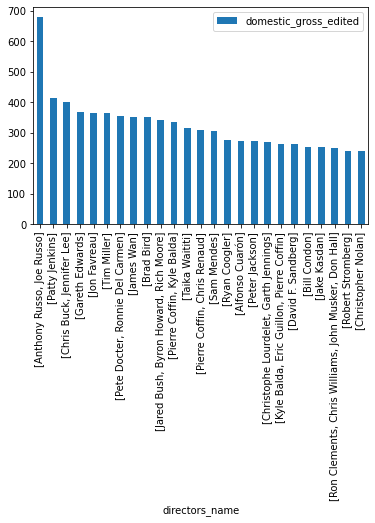

In [92]:
top_25_dge.plot(y='domestic_gross_edited',kind = 'bar')


<AxesSubplot:xlabel='directors_name'>

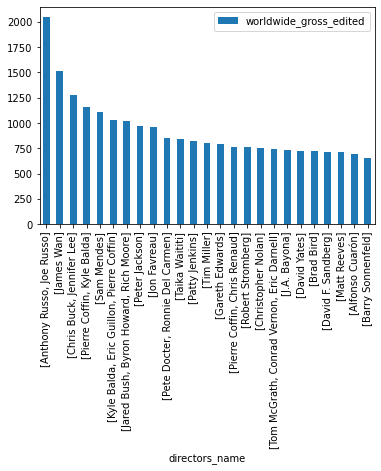

In [93]:
top_25_wwge.plot(y='worldwide_gross_edited',kind = 'bar')